# CLASS 10 / Classification / Abalone dataset

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#Dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [5]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [11]:
color = df.Sex.map({'F': 'red', 'I': 'green', 'M': 'blue'})

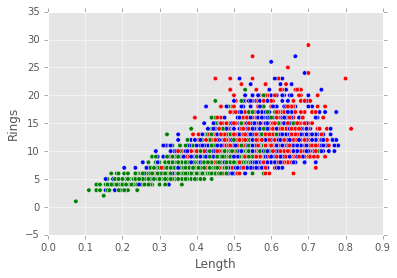

In [13]:
df.plot(x = 'Length', y = 'Rings', kind = 'scatter', c = color)

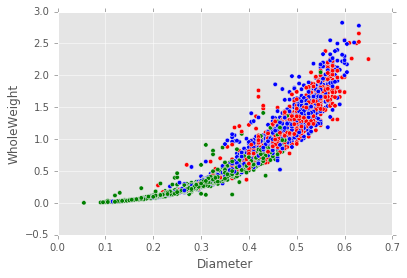

In [48]:
df.plot(x = 'Diameter', y = 'WholeWeight', kind = 'scatter', c = color)

In [31]:
c = df.Sex

In [23]:
c.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

# Trying to build model for Rings (AGE)

In [30]:
X = df[ ['Length', 'Height', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'] ]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c)

In [33]:
k = range(1, df.shape[0])

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

# Our poor results =>

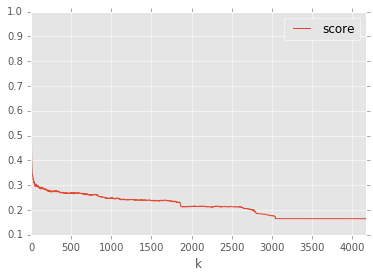

In [34]:
score_df.plot(x = 'k', y = 'score')

In [37]:
score_df[score_df.score>0.5]

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.592770
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.509217


# Tried to subset by sex (Male) and build a model

In [40]:
df_male = df[df.Sex == 'M']

In [41]:
df_male

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [42]:
c = df_male.Rings

In [43]:
Xm = df_male[ ['Diameter', 'WholeWeight'] ]

scaler_m = preprocessing.MinMaxScaler().fit(Xm)

Xm = scaler_m.transform(Xm)

In [44]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(Xm, c)

In [46]:
k = range(1, 100)

score_df_male = pd.DataFrame({'k': k})

score_df_male['model'] = score_df_male.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(Xm, c), axis = 1)

score_df_male['score'] = score_df_male.model.apply(lambda model: model.score(Xm, c))

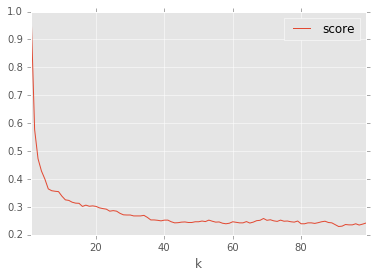

In [47]:
score_df_male.plot(x = 'k', y = 'score')

# Train / Test

In [49]:
c = df.Sex

In [50]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [51]:
train_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4169,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [52]:
test_df = df.drop(train_df.index)

In [53]:
test_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
12,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,11
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.1150,7
...,...,...,...,...,...,...,...,...,...
4165,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
4166,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,10
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [61]:
train_X = train_df[ ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Sex

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.67597765363128492

In [57]:
test_X = test_df[  ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

test_X = scaler.transform(test_X)

test_c = test_df.Infant

model.score(test_X, test_c)

0.52244165170556556

# Problem change and new model

In [58]:
def my_first_classifier(row):
    if row.Sex == 'I':
        return 1
    else:
        return 0
   
Infant = df.apply(my_first_classifier, axis = 1)

cat=Infant.rename("Infant")

df=df.join(cat)

In [59]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [63]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [64]:
test_df = df.drop(train_df.index)

In [65]:
train_X = train_df[ ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Infant

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.86033519553072624

In [66]:
test_X = test_df[  ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

test_X = scaler.transform(test_X)

test_c = test_df.Infant

model.score(test_X, test_c)

0.82585278276481144

In [68]:
k = range(1, 100)

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

In [69]:
score_df

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.742399
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.733062
3,4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.695715
4,5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.675365
...,...,...,...
94,95,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.565956
95,96,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.564041
96,97,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.563802
97,98,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.563802


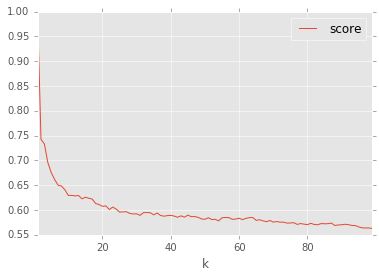

In [70]:
score_df.plot(x = 'k', y = 'score')

In [72]:
k_cv = 5 # 5-fold CV
k_nn = range(1, 100 * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
)

gs.fit(train_X, train_c)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'weights': [score.parameters['weights'] for score in gs.grid_scores_],
    'score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,k,score,weights
0,1,0.766560,uniform
1,1,0.766560,distance
2,2,0.777733,uniform
3,2,0.766560,distance
4,3,0.783719,uniform
...,...,...,...
153,77,0.814445,distance
154,78,0.816441,uniform
155,78,0.813647,distance
156,79,0.815243,uniform


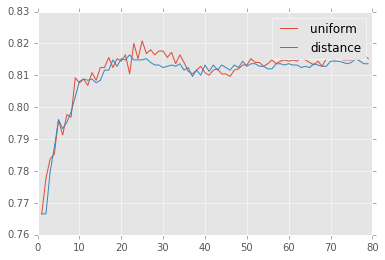

In [73]:
score_uniform_df = score_df[score_df.weights == 'uniform']
plt.plot(score_uniform_df.k, score_uniform_df.score, label = 'uniform')

score_distance_df = score_df[score_df.weights == 'distance']
plt.plot(score_distance_df.k, score_distance_df.score, label = 'distance')

plt.legend()

In [ ]:
smf.ols(formula = 'Rings ~ Sex', data = df).fit().summary()